In [3]:
##数据预处理
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

#显示训练与验证数据的shape
print("train data:",'images:',x_img_train.shape,"labels:",y_label_train.shape)
print("test data:",'images:',x_img_test.shape,"labels:",y_label_test.shape)

train data: images: (50000, 32, 32, 3) labels: (50000, 1)
test data: images: (10000, 32, 32, 3) labels: (10000, 1)


In [5]:
#将features标准化
x_img_train_normalize=x_img_train.astype('float32')/255.0
x_img_test_normalize=x_img_test.astype('float32')/255.0

In [11]:
#label(照片图像真实的值)以一位有效编码进行转换
from keras.utils import np_utils
y_label_train_onehot=np_utils.to_categorical(y_label_train)
y_label_test_onehot=np_utils.to_categorical(y_label_test)

##建立模型

from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D

model=Sequential()
#建立卷积层1
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))
#加入Dropout避免过度拟合
model.add(Dropout(rate=0.25))
#建立池化层1
model.add(MaxPooling2D(pool_size=(2,2)))
#建立卷积层2
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
#加入dropout避免过度拟合
model.add(Dropout(0.25))
#建立池化层2
model.add(MaxPooling2D(pool_size=(2,2)))
#建立平坦层
model.add(Flatten())
model.add(Dropout(rate=0.25))
#建立隐藏层
model.add(Dense(1024,activation='relu',))
model.add(Dropout(rate=0.25))
#建立输出层
model.add(Dense(10,activation='softmax'))
#查看模型摘要
print(model.summary())


##进行训练
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize,y_label_train_onehot,validation_split=0.2,epochs=10,batch_size=128,verbose=1)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0         
__________

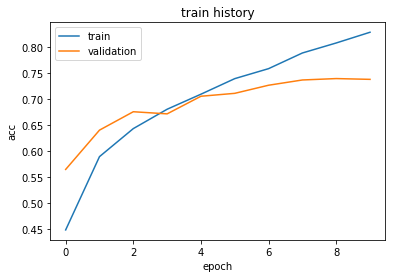

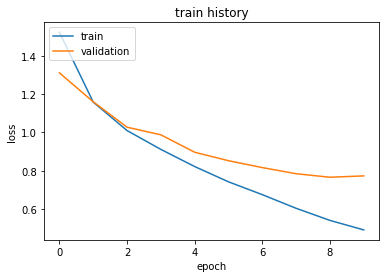

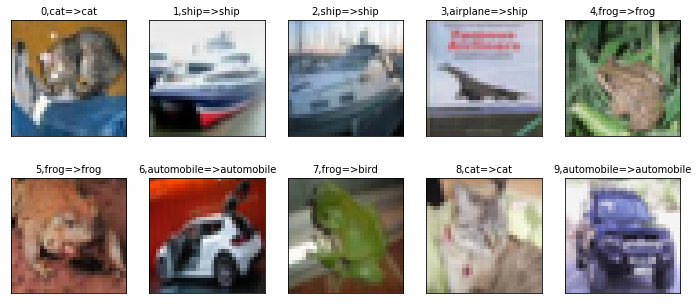

label: cat predict cat


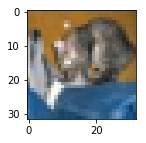

airplaneprobability:0.006034652
automobileprobability:0.000639395
birdprobability:0.004173581
catprobability:0.755802035
deerprobability:0.000851668
dogprobability:0.219988942
frogprobability:0.004705582
horseprobability:0.002195358
shipprobability:0.005464234
truckprobability:0.000144581
label: airplane predict ship


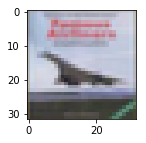

airplaneprobability:0.268576652
automobileprobability:0.003237699
birdprobability:0.027740469
catprobability:0.001034490
deerprobability:0.013432928
dogprobability:0.000022843
frogprobability:0.001266974
horseprobability:0.000129190
shipprobability:0.684256136
truckprobability:0.000302612


In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('train history')
    plt.ylabel(train)
    plt.xlabel('epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

#画出准确率执行的结果
show_train_history(train_history,'acc','val_acc')
#画出误差的执行结果
show_train_history(train_history,'loss','val_loss')


##评估模型准确率
scores=model.evaluate(x_img_test_normalize,y_label_test_onehot,verbose=0)
scores[1]

##进行预测
prediction=model.predict_classes(x_img_test_normalize)
prediction[:10]
#定义label_dict字典
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}
#创建plot_image_labels_prediction()函数，显示iamges和labels
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()
plot_images_labels_prediction(x_img_test,y_label_test,prediction,0,10)

##查看预测概率
predicted_probability=model.predict(x_img_test_normalize)
#建立 show_Predicted_Probability函数
def show_predicted_probability(y,prediction,x_img,predicted_probability,i):
    print('label:',label_dict[y[i][0]],'predict',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32,32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+'probability:%1.9f'%(predicted_probability[i][j]))
#查看第0项数据预测的概率
show_predicted_probability(y_label_test,prediction,x_img_test,predicted_probability,0)
#查看第3项数据预测的概率
show_predicted_probability(y_label_test,prediction,x_img_test,predicted_probability,3)


In [23]:
##显示混淆矩阵
prediction.shape
y_label_test.shape
y_label_test.reshape(-1)
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,rownames=['label'],colnames=['predict'])


{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,777,12,53,19,19,4,11,11,65,29
1,19,822,17,14,2,6,10,6,25,79
2,63,4,668,45,72,43,71,24,7,3
3,20,3,92,532,54,174,92,21,5,7
4,18,2,87,49,686,31,76,43,8,0
5,10,1,69,171,40,624,47,36,1,1
6,6,2,42,43,19,18,864,3,1,2
7,12,1,41,30,50,65,13,782,2,4
8,59,26,37,21,8,11,11,3,811,13


In [27]:
##建立3次的卷积运算神经网络

model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

#建立卷积层2与池化层2
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

#建立卷积层3与池化层3
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))

#建立神经网络
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2500,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1500,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

#训练模型
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize,y_label_train_onehot,validation_split=0.2,epochs=50,batch_size=300,verbose=1)






Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 323s 8ms/step - loss: 1.9493 - acc: 0.2695 - val_loss: 1.8945 - val_acc: 0.3266
Epoch 2/50
40000/40000 [==============================] - 317s 8ms/step - loss: 1.5010 - acc: 0.4428 - val_loss: 1.4302 - val_acc: 0.4792
Epoch 3/50
40000/40000 [==============================] - 335s 8ms/step - loss: 1.2712 - acc: 0.5390 - val_loss: 1.1700 - val_acc: 0.5803
Epoch 4/50
40000/40000 [==============================] - 362s 9ms/step - loss: 1.1007 - acc: 0.6039 - val_loss: 1.1820 - val_acc: 0.5894
Epoch 5/50
40000/40000 [==============================] - 320s 8ms/step - loss: 0.9777 - acc: 0.6521 - val_loss: 0.9358 - val_acc: 0.6683
Epoch 6/50
40000/40000 [==============================] - 328s 8ms/step - loss: 0.8830 - acc: 0.6880 - val_loss: 0.8802 - val_acc: 0.6882
Epoch 7/50
40000/40000 [==============================] - 340s 9ms/step - loss: 0.8017 - acc: 0.7151 - val_loss: 0.8036 - 

In [2]:
#评估训练模型
from keras.models import Sequential
scores=model.evaluate(x_img_test_normalize,y_label_test_onehot,verbose=0)

##模型的保存
model.save_weights("SaveModel/cifarCnnModel.h5")
print("Saved model to disk")


D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


NameError: name 'model' is not defined